In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import scipy

## Section 1 - Linear Regression

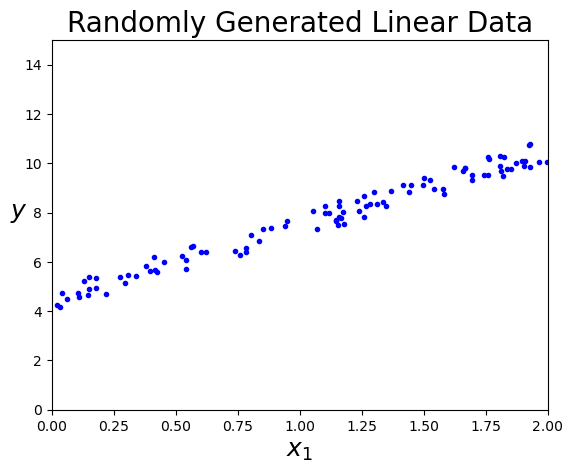

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([0, 2, 0, 15])
plt.title("Randomly Generated Linear Data", fontsize=20)
plt.show()

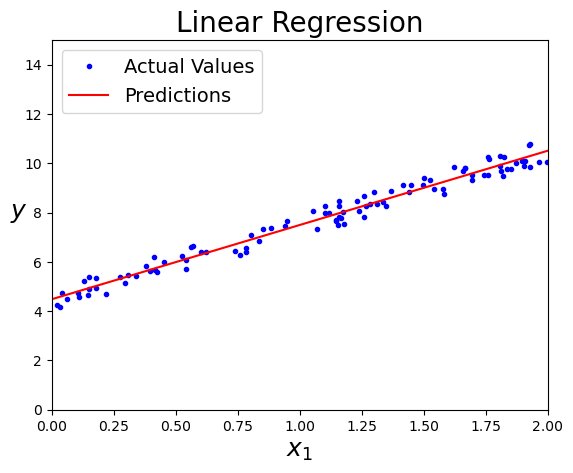

In [5]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

X_new = [[0], [2]]
y_predict = lin_reg.predict(X_new)

plt.plot(X, y, "b.", label = "Actual Values")
plt.plot(X_new, y_predict, "r-", label = "Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.title("Linear Regression", fontsize=20)
plt.show()

## Section 2 - Polynomial Regression - Degree 2

In [7]:
X2 = 5 * np.random.rand(100, 1) - 2 
y2 = 7 - 3 * X2 ** 2 + 7 * X2 - 2 * (np.random.rand(100, 1) - 0.5)

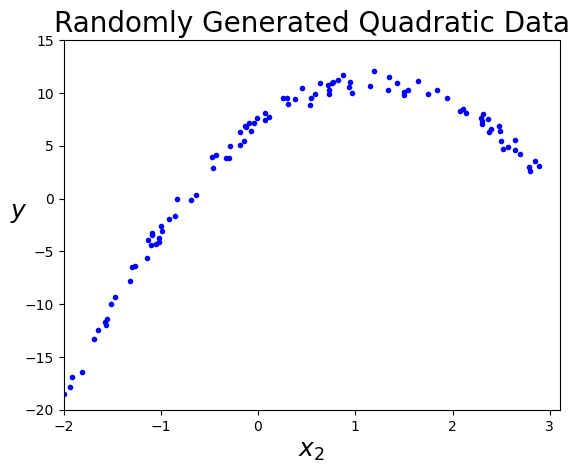

In [9]:
plt.plot(X2, y2, "b.")
plt.xlabel("$x_2$", fontsize=18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([-2, 3.1, -20, 15])
plt.title("Randomly Generated Quadratic Data", fontsize=20)
plt.show()

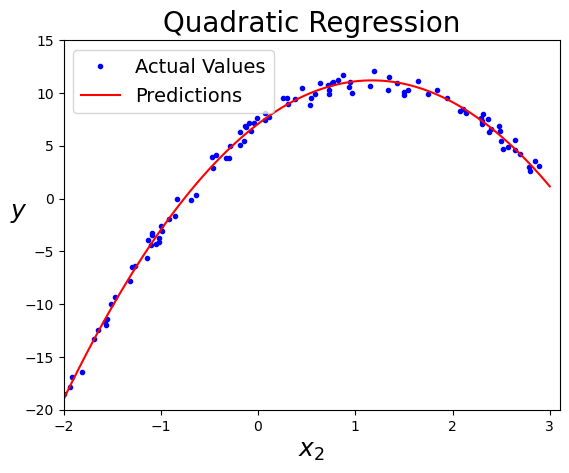

In [11]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly_2 = poly_features.fit_transform(X2)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_2, y2)

X2_new = np.linspace(-2, 3, 100).reshape(100, 1)
X2_new_poly = poly_features.fit_transform(X2_new)
y2_predict = lin_reg_2.predict(X2_new_poly)

plt.plot(X2, y2, "b.", label = "Actual Values")
plt.plot(X2_new, y2_predict, "r-", label = "Predictions")
plt.xlabel("$x_2$", fontsize=18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-2, 3.1, -20, 15])
plt.title("Quadratic Regression", fontsize=20)
plt.show()

## Section 3 - Exponential Regression

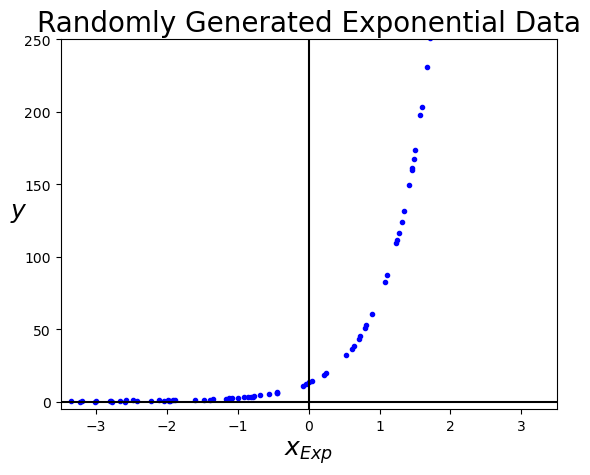

In [13]:
X_Exp = 7 * np.random.rand(100, 1) - 3.5 
y_Exp = 12.5 * np.exp(1.75 * X_Exp) + (np.random.rand(100, 1))

plt.plot(X_Exp, y_Exp, "b.")
plt.xlabel("$x_{Exp}$", fontsize=18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([-3.5, 3.5, -5, 250])
plt.axvline(x=0, color = "black")
plt.axhline(y=0, color = "black")
plt.title("Randomly Generated Exponential Data", fontsize=20)
plt.show()

In [15]:
Exp_Regression = np.polyfit(X_Exp[:,0], np.log(y_Exp[:,0]), 1)
Exp_Regression_Weighted = np.polyfit(X_Exp[:,0], np.log(y_Exp[:,0]), 1, w = np.sqrt(y_Exp[:,0]))
Exp_Regression_Curve_Fit = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  X_Exp[:,0],  y_Exp[:,0],
                         p0=(np.exp(Exp_Regression_Weighted[1]), Exp_Regression_Weighted[0]))

X_New = np.linspace(-3.5, 3.5, 100)
y_predict = np.exp(Exp_Regression[1])*np.exp(Exp_Regression[0]*X_New)
y_predict_weighted = np.exp(Exp_Regression_Weighted[1])*np.exp(Exp_Regression_Weighted[0]*X_New)
y_predict_curve_fit = Exp_Regression_Curve_Fit[0][0] * np.exp(Exp_Regression_Curve_Fit[0][1] * X_New)

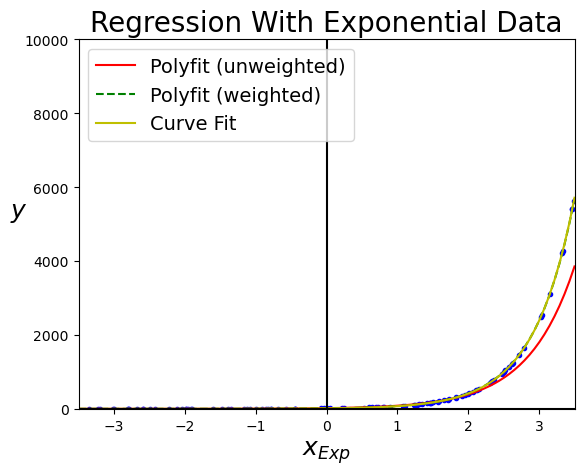

In [17]:
plt.plot(X_Exp, y_Exp, "b.")
plt.plot(X_New, y_predict, "r-", label = "Polyfit (unweighted)")
plt.plot(X_New, y_predict_weighted, "g--", label = "Polyfit (weighted)")
plt.plot(X_New, y_predict_curve_fit, "y-", label = "Curve Fit")
plt.xlabel("$x_{Exp}$", fontsize=18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([-3.5, 3.5, -5, 10000])
plt.axvline(x=0, color = "black")
plt.axhline(y=0, color = "black")
plt.title("Regression With Exponential Data", fontsize=20)
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [19]:
y_fit = np.exp(Exp_Regression[1])*np.exp(Exp_Regression[0]*X_Exp)
y_fit_weighted = np.exp(Exp_Regression_Weighted[1])*np.exp(Exp_Regression_Weighted[0]*X_Exp)
y_fit_curve_fit = Exp_Regression_Curve_Fit[0][0] * np.exp(Exp_Regression_Curve_Fit[0][1] * X_Exp)

RMSE1 = np.sqrt(mean_squared_error(y_Exp, y_fit))
RMSE2 = np.sqrt(mean_squared_error(y_Exp, y_fit_weighted))
RMSE3 = np.sqrt(mean_squared_error(y_Exp, y_fit_curve_fit))

RMSEs = {'Method' : ['Polyfit', 'Polyfit weighted', 'Curve Fit'], 'RMSE' : [RMSE1, RMSE2, RMSE3]}
pd.DataFrame.from_dict(RMSEs, orient = 'columns')

,Method,RMSE
0,Polyfit,381.543761
1,Polyfit weighted,4.090233
2,Curve Fit,0.452130
